In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit

In [2]:
def generating_function(t, par):
    return par[0] + par[1]*t + par[2]*np.sin(par[4]*t) + par[3]*np.cos(par[4]*t)
        
def fit_function(t, a, b, c, d, e):
    return a + b*t + c*np.sin(e*t) + d*np.cos(e*t)

def fit_function2(t, a, b, c, d, e):
    return a + b*t + c*np.sin(d*t + e)

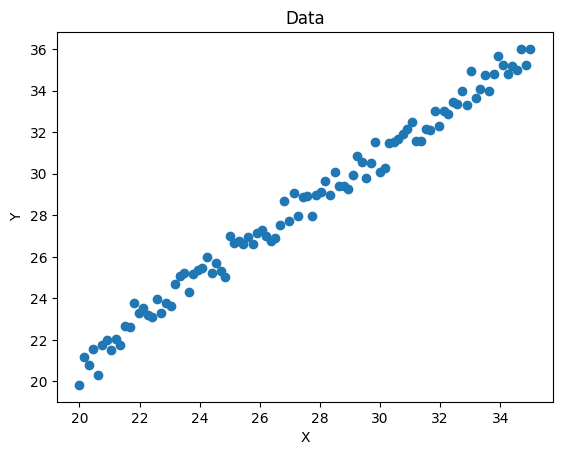

In [3]:
n = 100
par = [0.0, 1.0, 1.0, 1.0, 0.0]
x = np.linspace(20,35,n)
y = []

for i in range(0,n):
    r = random.gauss(0.0,0.5)
    y.append(generating_function(x[i],par)+r)


fig, ax = plt.subplots()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Data')
ax.plot(x,y,'o')

Fit params:  [ 1.36138582  0.98550852  0.05393999 -0.11642999  1.19929445]
Errors in Fit params:  [0.33343283 0.01196749 0.43350573 0.21573104 0.13257326]
Fit 1: 24.1362001065771


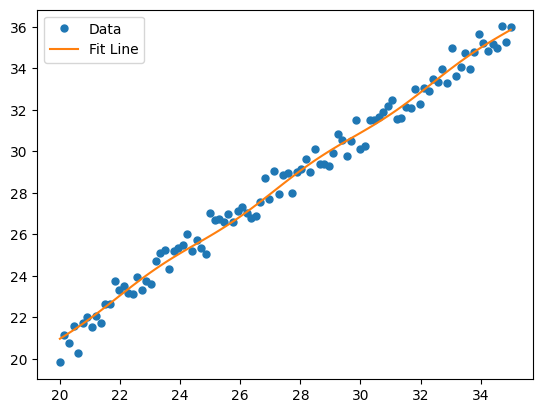

In [4]:
fit_params, covariance_matrix = curve_fit(fit_function, x, y)
fit_line = fit_function(x, *fit_params)
error_fit_params = np.sqrt(np.diag(covariance_matrix))

print("Fit params: ",fit_params)
print("Errors in Fit params: ",error_fit_params)

# Calculate chi-squared
residuals = y - fit_line
chi2 = np.sum(residuals ** 2)
print(f"Fit 1: {chi2}\n")

fig, ax = plt.subplots()
ax.plot(x, y, 'o', markersize=5, label='Data')
ax.plot(x, fit_line, '-', label='Fit Line')
ax.legend()
plt.show()

Fit params:  [ 1.36139484  0.98550822 -0.12831729  1.19929932 -4.27879566]
Errors in Fit params:  [0.33343225 0.01196747 0.07273796 0.13257314 3.73075406]
Fit 1: 24.136200044320184


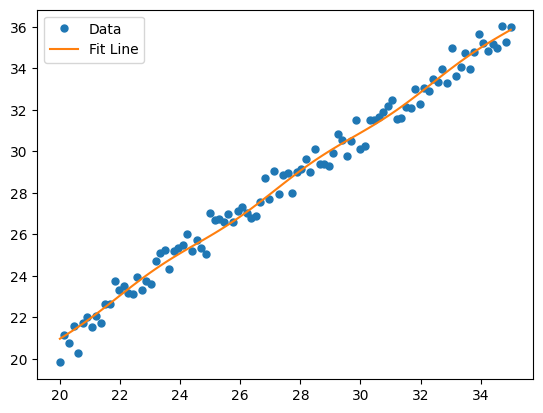

In [5]:
fit_params2, covariance_matrix2 = curve_fit(fit_function2, x, y)
fit_line2 = fit_function2(x, *fit_params2)
error_fit_params2 = np.sqrt(np.diag(covariance_matrix2))

print("Fit params: ",fit_params2)
print("Errors in Fit params: ",error_fit_params2)

# Calculate chi-squared
residuals2 = y - fit_line2
chi2_2 = np.sum(residuals2 ** 2)
print(f"Fit 1: {chi2_2}\n")

fig, ax = plt.subplots()
ax.plot(x, y, 'o', markersize=5, label='Data')
ax.plot(x, fit_line2, '-', label='Fit Line')
ax.legend()
plt.show()